# Analytics Oasis Day 3 - Hypothesis testing
## Steve's version
### Your challenge for today is to develop and test a hypothesis using an existing data set

To successfully complete this challenge, you will need to: 
    
1. Import the appropriate libraries
2. Load up the data set
3. "Eyeball" the data
4. Develop a hypothesis
5. Give a theoretical basis for that hypothesis, with literature
6. Perform a statistical analysis
7. Determine whether you find in favour of the hypothesis, or against the hypothesis. You may find for the null hypothesis.
8. Answer the **interpretation question**


## 1. Import the appropriate libraries

We need to load up libraries first. 

Normally, we should try to be parsimonious and do as much as possible in base Python. But we are going to need a few for this assignment, especially as you only have today to complete this!

In [1]:
# import libraries.
# we'll abbreviate library names
# to save us typing so much later

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import requests
from io import StringIO

# you may not have stargazer; this will test
# whether you have and install if you haven't

try:
    import stargazer
    print("Stargazer is already installed.")
except ImportError:
    print("Stargazer is not installed. Installing now...")
    !pip install stargazer

from stargazer.stargazer import Stargazer


Stargazer is not installed. Installing now...
  Using cached stargazer-0.0.7-py3-none-any.whl.metadata (6.3 kB)
Using cached stargazer-0.0.7-py3-none-any.whl (15 kB)


## 2. Load up the data set

Now we'll load the data. In this case, I've put them on the __Harvard Dataverse__, so we'll load them directly from there.


In [2]:
# load directly from the Harvard Dataverse

file_url = 'https://dataverse.harvard.edu/api/access/datafile/8154556'

response = requests.get(file_url)
response.raise_for_status()

# we'll call the data frame 'cc'
# (short for Chat Chip, the pseudonym of the author
# of a book about fish and chips)

cc = pd.read_csv(StringIO(response.text), sep='\t')

# now check to see if the data have downloaded
# and been passed to the data frame

if cc.empty: 
    print("Data not loaded.")
else: 
    print("Data successfully loaded.")

# if the above doesn't work, you can download
# manually from here: 
# https://doi.org/10.7910/DVN/SIGCJ1


Data successfully loaded.


## 3. "Eyeball" the data

Ok, what are we actually looking at here? Let's take a look to see what we've got.

In [3]:
# what do the data look like? 
# first off, how many variables do we have? 

print('Number of variables:   ', len(cc.columns))

# and how many rows of data do we have? 

print('Number of rows of data:', len(cc))
print("(That's one row for each UK parliamentary constituency)") 

# let's see the variable names 

print('\nVariable names: ') 

list(cc.columns)

Number of variables:    490
Number of rows of data: 650
(That's one row for each UK parliamentary constituency)

Variable names: 


['PCON11CD',
 'cName',
 'country',
 'region',
 'IndianRestaurants',
 'ItalianRestaurants',
 'ChineseRestaurants',
 'PubRestaurants',
 'SpecialityRestaurants',
 'TraditionalRestaurants',
 'EnglishRestaurants',
 'FishandChipShopsandRestaurants',
 'FastFoodRestaurants',
 'ThaiRestaurants',
 'EuropeanRestaurants',
 'ModernCuisineRestaurants',
 'MediterraneanRestaurants',
 'SeafoodRestaurants',
 'AmericanRestaurants',
 'TurkishRestaurants',
 'HotelRestaurants',
 'PortugueseRestaurants',
 'JapaneseRestaurants',
 'FrenchRestaurants',
 'AfricanRestaurants',
 'MexicanRestaurants',
 'SteakhouseRestaurants',
 'CaribbeanRestaurants',
 'SpanishRestaurants',
 'MiddleEasternRestaurants',
 'GreekRestaurants',
 'LebaneseRestaurants',
 'VegetarianRestaurants',
 'Bistros',
 'NepaleseRestaurants',
 'BangladeshiRestaurants',
 'Pizzerias',
 'PersianRestaurants',
 'PizzaDeliveryandTakeaway',
 'KoreanRestaurants',
 'IndianTakeaways',
 'MoroccanRestaurants',
 'PolishRestaurants',
 'ScottishRestaurants',
 'Indo

### Let's look at one variable

I'm interested in fish and chips. There are two fish and chip variables: 

 - __FishandChipShopsandRestaurants__
 - __FishandChipShopsandRestaurantsQuotient__ 

The first is the __absolute number__ of fish and chip shops in each UK parliamentary constituency. 

The second (the quotient) is the number of fish and chip shops in that constituency __divided by__ the total number of all restaurants in that constituency.

I suspect that the second will be more useful. 

So what does the variable __FishandChipShopsandRestaurantsQuotient__ look like?

In [4]:
# show basic descriptive statistics on the 
# FishandChipShopsandRestaurantsQuotient variable

print(cc['FishandChipShopsandRestaurantsQuotient'].describe())

count    650.000000
mean       0.142999
std        0.055559
min        0.019178
25%        0.105567
50%        0.135463
75%        0.184323
max        0.347541
Name: FishandChipShopsandRestaurantsQuotient, dtype: float64


Ok, it would be handier if those were percentages. Plus that variable name is a little cumbersome: we could use a shorter name! 

In [5]:
# make new var, multiplied by 100

cc['fishPC'] = cc['FishandChipShopsandRestaurantsQuotient'] * 100

# now let's see the descriptive
# statistics again

print(cc['fishPC'].describe())

count    650.000000
mean      14.299947
std        5.555904
min        1.917808
25%       10.556731
50%       13.546289
75%       18.432311
max       34.754098
Name: fishPC, dtype: float64


Now let's do the same thing with the __brexitShare__ variable: 

In [6]:
# show descriptive statistics of brexitShare

print('brexitShare: ') 
print(cc['brexitShare'].describe()) 

# make another new var, multiplied by 100

cc['brexitPC'] = cc['brexitShare'] * 100

# see the numbers again

print('\n\nbrexitPC: ') 
print(cc['brexitPC'].describe())


brexitShare: 
count    650.000000
mean       0.518300
std        0.115101
min        0.204808
25%        0.450699
50%        0.536146
75%        0.599746
max        0.756499
Name: brexitShare, dtype: float64


brexitPC: 
count    650.000000
mean      51.830017
std       11.510071
min       20.480789
25%       45.069896
50%       53.614565
75%       59.974579
max       75.649871
Name: brexitPC, dtype: float64


## 4. Develop a hypothesis

So you need to have a hypothesis. For me, it's going to be this: 

 - __H1__: The greater the proportion of fish and chip shops in a UK constituency, relative to all other restaurants or food-outlets, the greater the support for the UK leaving the European Union. 
                                                                                                                                                             
                                                        

## 5. Give a theoretical basis for that hypothesis, with literature

You need to give some theoretical explanation for your hypothesis. You also need to give sources in the literature to back up this theoretical expectation. 

Here's what I'm going with: 

There are numerous theoretical explanations of why certain parts of the UK were more supportive of leaving the European Union than others. These theories include the “left behind”, “let down” or “not existing” narratives (see Ford and Goodwin (2014); Goodwin and Heath (2016); Mckenzie (2017); Sykes (2018); Watson (2018); Isakjee and Lorne (2019); Nurse and Sykes (2019); Richards et al. (2021)). Brexit has also been linked to inequality (Bachmann and Sidaway (2016);
Dorling (2018)) and deprivation (Chan et al. (2020)). On the flip side, more cosmopolitan areas were found to be less supportive of Brexit (see Andreouli and Howarth (2019); Beech (2021)).

The theoretical expectation of this hypothesis is that fish and chip shops are a proxy for the left behind, let down areas; they will be found in areas of inequality and deprivation, due to their historical association with industrialisation. Conversely, they will be an inverse proxy for cosmopolitanism: the more cosmopolitan an area is, the less supportive it will be of Brexit. 

### Sources cited  

 - Andreouli, Eleni and Caroline Howarth (2019). Everyday cosmopolitanism in representations of Europe among
young Romanians in Britain. *Sociology 53*(2), 280–296.

 - Bachmann, Veit and James D Sidaway (2016). Brexit geopolitics. *Geoforum 77*, 47–50.

 - Beech, Matt (2021). Brexit and the labour party: Europe, cosmopolitanism and the narrowing of traditions.
*British Politics 16*(2), 152–169.

 - Chan, Tak Wing, Morag Henderson, Maria Sironi, and Juta Kawalerowicz (2020). Understanding the social and
cultural bases of Brexit. *The British Journal of Sociology 71*(5), 830–851.

 - Ford, Robert and Matthew Goodwin (2014). Understanding UKIP: Identity, social change and the left behind.
*The Political Quarterly 85*(3), 277–284.

 - Dorling, Danny (2018). *Peak inequality: Britain’s ticking time bomb*. Policy Press.

 - Goodwin, Matthew and Oliver Heath (2016). The 2016 referendum, Brexit and the left behind: An aggregate-level
analysis of the result. *The Political Quarterly 87*(3), 323–332.

 - Isakjee, Arshad and Colin Lorne (2019). Bad news from nowhere: Race, class and the ‘left behind’. *Environment
and Planning C: Politics and Space 37*(1), 7–12.

 - Mckenzie, Lisa (2017). The class politics of prejudice: Brexit and the land of no-hope and glory. *The British
Journal of Sociology 68*, S265–S280.

 - Nurse, Alexander and Olivier Sykes (2019). It’s more complicated than that! Unpacking ‘left behind Britain’ and
some other spatial tropes following the UK’s 2016 EU referendum. *Local Economy 34*(6), 589–606.

 - Richards, Lindsay , Anthony Heath, and Noah Carl (2021). Not just ‘the left behind’? Exploring the effects of
subjective social status on Brexit-related preferences. *Contemporary Social Science 16*(3), 400–415.

 - Sykes, Olivier (2018). Post-geography worlds, new dominions, left behind regions, and ‘other’ places: unpacking
some spatial imaginaries of the UK’s ‘Brexit’ debate. *Space and Polity 22*(2), 137–161.

 - Watson, Matthew (2018). Brexit, the left behind and the let down: The political abstraction of ‘the economy’
and the UK’s EU referendum. *British Politics 13*(1), 17–30.


## 6. Perform a statistical analysis

### Correlation

For the analysis, a good place to start is with a correlation. Two things to remember: 
    
1. Correlation does not equal causation. 
2. In the social sciences, if you are north of 0.3, you might be on to something.

In [7]:
# print the correlation

print('Correlation between fishPC and brexitPC: ')
print(cc['fishPC'].corr(cc['brexitPC']))

Correlation between fishPC and brexitPC: 
0.5584497155664393


### Scatterplot

We can get a much better understanding of the relationship if we can visualise it. 

So let's create a scatterplot, and we'll even put a regression line in. 

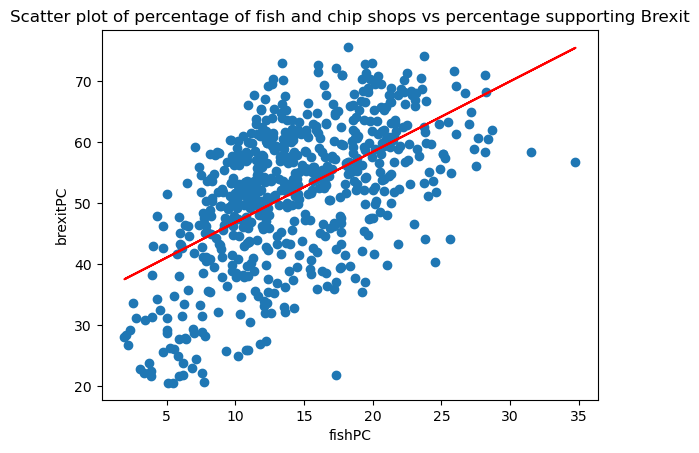

In [8]:
# define our x and y axes

x = cc['fishPC']
y = cc['brexitPC']

# remove any missing values from x and y

mask = ~np.isnan(x) & ~np.isnan(y) & ~np.isinf(x) & ~np.isinf(y)
x, y = x[mask], y[mask]

# create the scatter plot

plt.scatter(x, y)

# put names on it

plt.title('Scatter plot of percentage of fish and chip shops vs percentage supporting Brexit')
plt.xlabel('fishPC')
plt.ylabel('brexitPC')

# let's get all fancy and do a regression line
# (or line of best fit) 

slope, intercept = np.polyfit(x, y, 1)
line = slope * x + intercept

# add the line to the plot 

plt.plot(x, line, color='red')

# render the scatter plot

plt.show()

In [1]:
### A note for statistical purists 

# Ok, in general, we should make sure that our data are __normally distributed__. But in this case our N is 650. 

# When the N is sufficiently large (and 650 is), then the __Central Limit Theorem__ comes into play: the sampling distribution of the mean should be normally distributed, regardless of the distribution of the underlying data. 

# Normally, you __should__: 

#  - do a visual inspection, such as through a historgram or Q-Q plot of the residuals
#  - run statistical tests, such as the Shapiro-Wilk test or the Kolmogorov-Smirnov test

# But the N is large enough. And you only have today to complete this! So we will skip these!

### Regression models

Let's run two models. 

 - The first base model will be __bivariate__: it will just have one dependent variable (brexitShare) and one independent variable (fishPC)
 - The second model will be __multivariate__: it will have lots of other theoretically appropriate control variables
    
If our key independent variable (fishPC) survives all of that, then we can find in favour of the hypothesis (if it's positive!). 

We'll be running __Ordinary Least Squares (OLS)__ models, which are also known as __Linear Regression__ models. 

In [ ]:
# build models

# first, the base model

model1 = smf.ols('brexitPC ~ fishPC', data=cc).fit()

# now a model with controls

model2 = smf.ols('brexitPC ~ fishPC + c11NSSECRoutine + c11BornOtherEU + c11Age20to24 + c11EthnicityWhite + healthDeprivationAndDisability + c11Degree', data=cc).fit()

# show the output of the models

print(model1.summary())
print(model2.summary())

### Simplify this

Python is what is known as a 'verbose' language, and its libraries are equally verbose. 

Put another way, it talks too much. We're getting a lot of unnecessary information here. Let's simplify it with Stargazer. 

In [ ]:
# whoah, that's too much information! 
# let's get all fancy and make it look like 
# regression tables in a journal article

# we'll use stargazer, which is based on the 
# stargazer library in R. Watch out though; 
# the Python version is buggy as hell

# don't even think about using stargazer
# to display the results of more than one model
# per block of code. it will screw it up.

star1 = Stargazer([model1])

star1


In [ ]:
# and here's the second model in a second block
# because stargazer is riddled with errors.

star2 = Stargazer([model2])

star2

## 7. Determine whether you find in favour of the hypothesis, or against the hypothesis. You may find for the null hypothesis.

In this case, we find __in favour of the hypothesis__. Here's why: 

 - There is a positive correlation (0.56) between fish and chip shops and Brexit share
 - There is a strong, positive relationship (p < 0.01) between fish and chip shops and Brexit. In a bivariate regression model, over 30 per cent of the Brexit variance (R^2 = 0.312) is explained by fish and chip shops alone. 
 - In the base model, every time we increase the percentage of fish and chip shops by one per cent, we increase the Brexit vote by 1.157 per cent. 
 - When we introduce other key control variables which have been identified in the literature as key determinants of Brexit, fish and chip shops remain strongly significant. 

## 8. Answer the **interpretation question**

The regression table gave us an R-squared value, and the variables have coefficients and standard errors. What can these tell us about how well your model worked? 